# Introduction


This tutorial is about generating different groove types and using the groove methods. The methods are seperatable in X parts:

* Creating a groove with `get_groove`
* Converting a groove to a profile
* Using `plot` on a profile constructed by a groove
* All possible groove types as plot
* saving and loading grooves with ASDF

First starting with the imports:

In [ ]:
%cd ..

In [2]:
# ASDF imports
import asdf

# Creating grooves
from weldx import Q_ as Quantity  # pint quantity from the weldx package
from weldx.asdf.extension import WeldxAsdfExtension, WeldxExtension
from weldx.asdf.tags.weldx.core.iso_groove import get_groove

# Creating a groove

Each groove type has different input variables, which must be passed along with it. For this we need the `Groove Type` as string and the `attributes` that describe this `Groove Type`. All attributes are used with pint quantity, we recommend to use the quantity class created by us.

Here an Example with a V-Groove. Note that `groove_type="VGroove"` and the required attributes are `workpiece_thickness`, `groove_angle`, `root_gap` and `root_face`.

In [3]:
# Workpiece thickness (note the use of 'cm')
t = Quantity(1, "cm")
# groove angle
alpha = Quantity(55, "deg")
# root gap
b = Quantity(2, "mm")
# root face
c = Quantity(1, "mm")

v_groove = get_groove(
    groove_type="VGroove",
    workpiece_thickness=t,
    groove_angle=alpha,
    root_gap=b,
    root_face=c,
)

display(v_groove)

VGroove(t=<Quantity(1, 'centimeter')>, alpha=<Quantity(55, 'degree')>, c=<Quantity(1, 'millimeter')>, b=<Quantity(2, 'millimeter')>, code_number=['1.3', '1.5'])

As shown above you pass the `groove_type` along with the `attributes` and get your `Groove class`. Function `get_groove` has a detailled description for all Groove Types and their Attributes.

Note: All classes can also be created separately with the classes, but this is not recommended.
```Python
from weldx.asdf.tags.weldx.core.iso_groove import VGroove

v_groove = VGroove(t, alpha, c, b)
```

# Convert a groove to a profile

Each `groove class` can be converted into a `Profile` by calling its `to_profile` function. To learn more about the `Profile` class and its uses look into `geometry_01_profiles.ipynb`.
Profiles created this way consist of one shape per mating part. For the V-Groove each mating part is made up of four basic lines.

In [12]:
v_profile = v_groove.to_profile()
print(v_profile)

Profile with 2 shapes
Shape 0:
Line: [-7.69, 0.  ] -> [-1., 0.]
Line: [-1., 0.] -> [-1., 1.]
Line: [-1., 1.] -> [-5.69,10.  ]
Line: [-5.69,10.  ] -> [-7.69,10.  ]

Shape 1:
Line: [7.69,0.  ] -> [1.,0.]
Line: [1.,0.] -> [1.,1.]
Line: [1.,1.] -> [ 5.69,10.  ]
Line: [ 5.69,10.  ] -> [ 7.69,10.  ]


# Using plot on a profile constructed by a groove

We can visualize the profile by simply calling the `plot()` function of the groove object. Carefully note the labeling (yz) and orientation of the axis. The plot shows the groove as seen along the negative x-axis (against the welding direction).

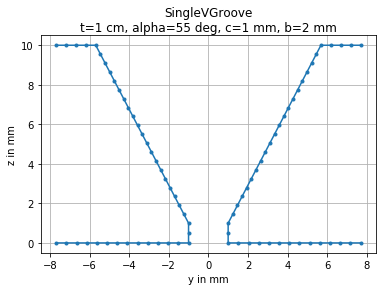

In [5]:
v_groove.plot()

As explained above you see that this V-groove has two halves and a V-Groove layout. The plot scaling is always in `millimeter`.

The `plot` method has the following attributes:
* `title`

    Setting from matplotlib. Default: `None`
* `raster_width`

    Is the ratio of the rasterized points between each joint.
* `axis`

    Setting from matplotlib. Default: `equal`
* `grid`

    Setting from matplotlib. Default: `True`
* `line_style`

    Setting from matplotlib. Default: `'.'`
* `ax`

    Setting from matplotlib. Default: `None`


Here is the same plot with different options:

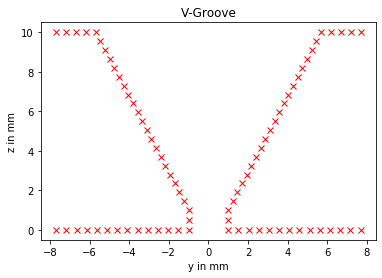

In [6]:
v_profile.plot(title="V-Groove", raster_width=0.5, grid=False, line_style="rx")

# All possible Groove Types

An overview of all possible groove types:

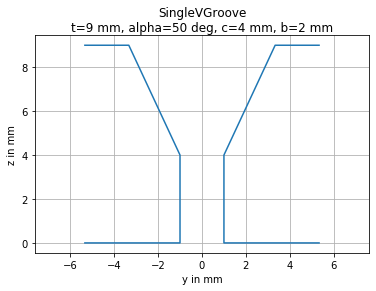

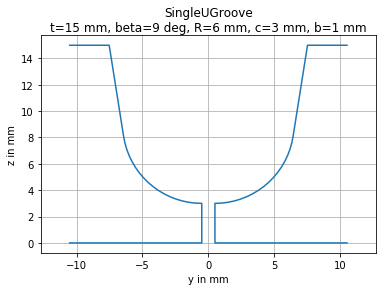

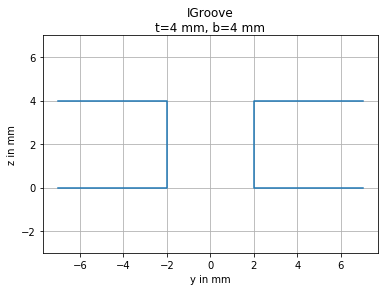

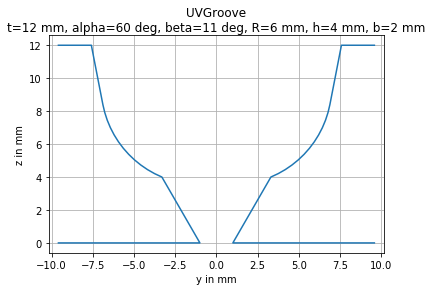

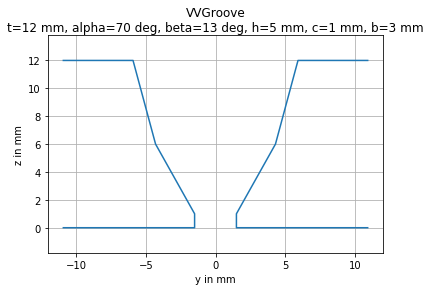

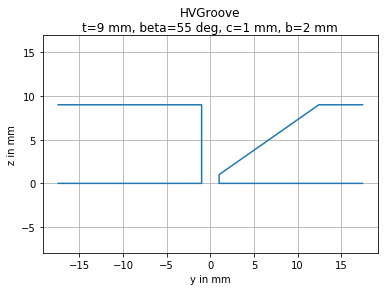

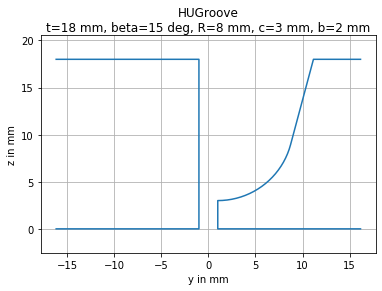

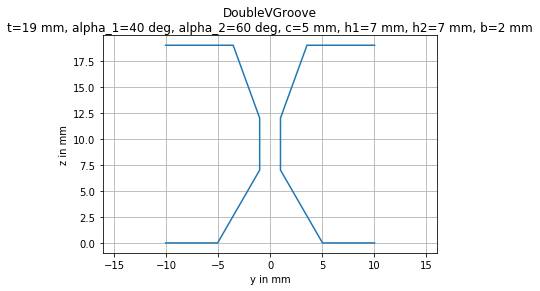

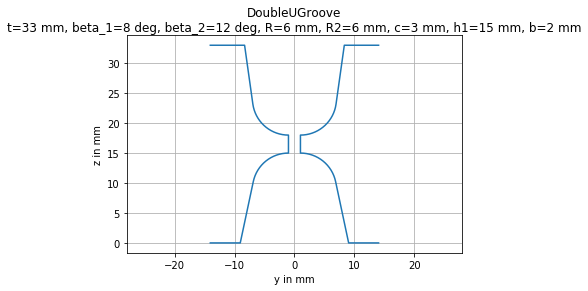

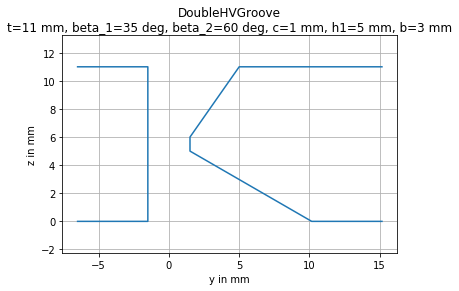

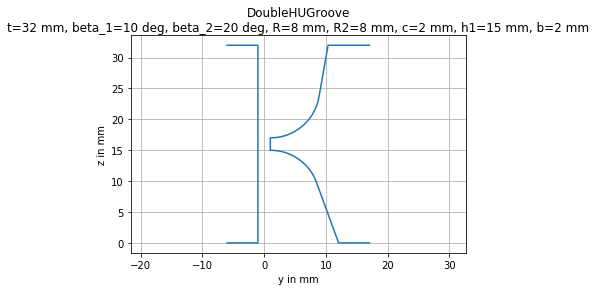

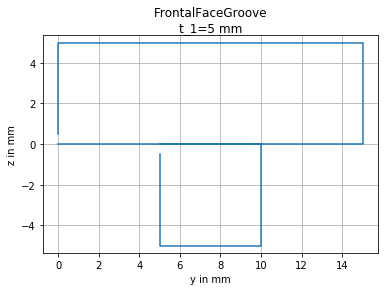

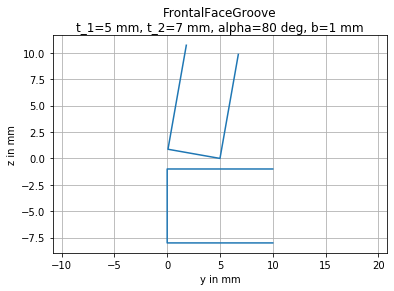

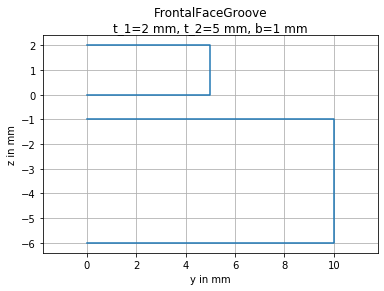

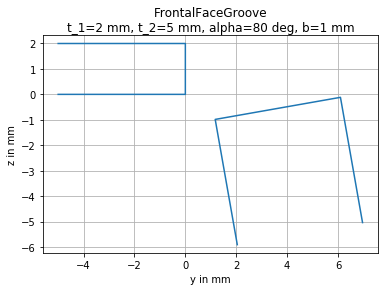

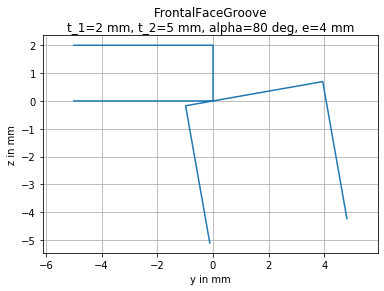

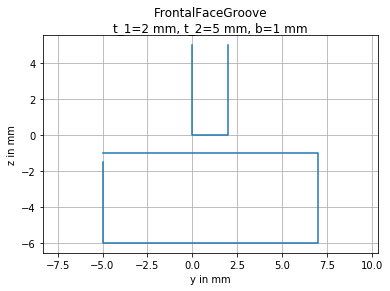

In [7]:
# generate test grooves
from tests.test_asdf_groove import _create_test_grooves

groove_dict = _create_test_grooves()
for k in ["dv_groove2", "dv_groove3", "du_groove2", "du_groove3", "du_groove4"]:
    groove_dict.pop(k, None)

for k, v in groove_dict.items():
    v[0].plot(line_style="-")

# ASDF and Grooves

All groove types can be save to _ASDF_-files with the included schemas and _ASDF_-extension from the weldx-package.

Save as `.asdf` file:

In [8]:
filename = "iso_grooves.asdf"  # when using an external editor, using .yaml suffix should enable yaml-highlighting and also works for asdf-files

with asdf.AsdfFile(
    dict(test_v_groove=v_groove), extensions=[WeldxExtension(), WeldxAsdfExtension()],
) as ff:
    ff.write_to(filename, all_array_storage="inline")

The `iso_grooves.asdf` file is now stored in the working directory. We can show the contents in the notebook using pygments highlighting:

In [9]:
try:
    from pathlib import Path
    from pygments import highlight
    from pygments.lexers import get_lexer_for_filename, get_lexer_by_name
    from pygments.formatters import HtmlFormatter
    import IPython
except ImportError as error:
    print(error)
    pass
else:

    def notebook_fileprinter(filename):
        """
        Prints the code from the filename highlighted depending on its type.

        eg.:
        > notebook_fileprinter(test.py)
        > def test:
        >     return
        Would have python highlighting.
        """

        with open(filename) as f:
            code = f.read()

        if Path(filename).suffix == ".asdf":
            lexer = get_lexer_by_name("YAML")
        else:
            lexer = get_lexer_for_filename(filename)
        formatter = HtmlFormatter()
        return IPython.display.HTML(
            '<style type="text/css">{}</style>{}'.format(
                formatter.get_style_defs(".highlight"),
                highlight(code, lexer, formatter),
            )
        )


notebook_fileprinter(filename)

The single V-Groove is now stored in the _ASDF_-file with the name `test_v_groove`. It has a `type` and its `components` shown.

Now let's load the file `iso_grooves.asdf` again:

In [10]:
reopen = asdf.open(filename, extensions=[WeldxExtension(), WeldxAsdfExtension()],)
reopen["test_v_groove"]

VGroove(t=<Quantity(1, 'centimeter')>, alpha=<Quantity(55, 'degree')>, c=<Quantity(1, 'millimeter')>, b=<Quantity(2, 'millimeter')>, code_number=['1.3', '1.5'])

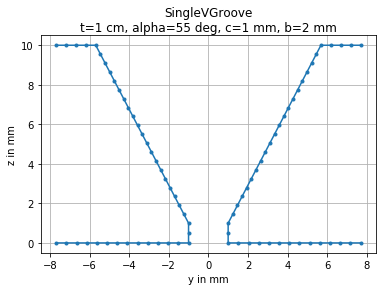

In [11]:
reopen["test_v_groove"].plot()